In [ ]:
# chuanra bi du lieu
import tensorflow as tf
import numpy as np
import pandas as pd

image_data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = image_data.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


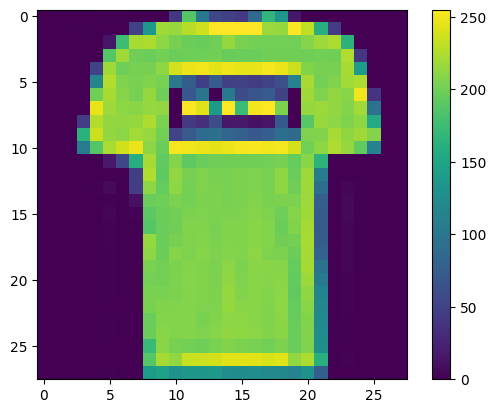

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()



In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [11]:
# perceptron
model = tf.keras.Sequential([
    # Lớp convolution đầu tiên với 32 bộ lọc, kích thước kernel 3x3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Lớp Pooling để giảm kích thước
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Lớp convolution thứ hai với 64 bộ lọc
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Lớp Pooling tiếp theo
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten dữ liệu thành vector 1D để đưa vào fully connected layers
    tf.keras.layers.Flatten(),
    # Lớp fully connected với 128 neuron
    tf.keras.layers.Dense(128, activation='relu'),
    # Lớp đầu ra với 10 neuron (tương ứng với 10 lớp) và softmax
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# train_images = np.expand_dims(train_images, axis=-1)  # Chuyển thành (60000, 28, 28, 1)
train_images = np.squeeze(train_images)
train_images = np.expand_dims(train_images, axis=-1)  # Chuyển thành (60000, 28, 28, 1)

datagen.fit(train_images)
model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.5934 - loss: 1.1138
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.7412 - loss: 0.6885
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - accuracy: 0.7755 - loss: 0.6022
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7928 - loss: 0.5599
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8064 - loss: 0.5213
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8150 - loss: 0.4991
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8201 - loss: 0.4796
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8248 - loss: 0.4723
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8263 - loss: 0.4607
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8322 - loss: 0.4510


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


9

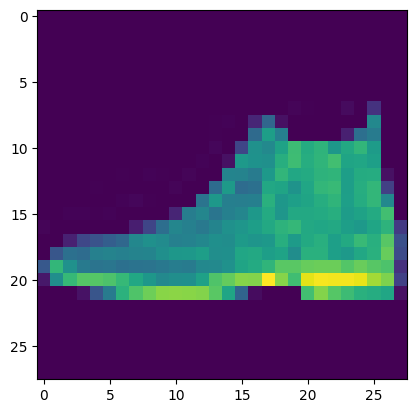

In [12]:
result = model.predict(test_images)[0]
plt.imshow(test_images[0])
test_labels[0]

In [ ]:
import tensorflow as tf
print(tf.__version__)
